

Team Members:

Görkem Yar <br>
Sueda Şeker <br>
Ege Aktemur <br>
Kaan Bilgili <br>
Tacettin Emre Bök <br>

## Introduction



In this project, we will try to figure out how number of casual and registered bike users change during specific conditions. Furthermore, with the help of these findings about how number of registered and casual users changes under specific conditions, we will try to predict the number of registered/casual users for forthcoming days. We are planning to utilize machine learning methods such as regression, KNN and random forest for this task. To elaborate more, we will look for factors that affect the number of registered bike users and casual bike users. For example, we guess that most of the registered users are workers that use bikes to go to their work. By the hourly data of the bike sharing, we could see this factor more clearly. Furthermore, weather is a crucial factor for casual bike users because we guess that if the weather is clear, people would be more likely to casually rent a bike. With the help of the weather and casual bike users’ data in the dataset, we can show clearly if this guess is true or not. To conclude, this approach to the dataset is very important as we could understand the motivations behind renting a bike, both for registered and casual users. In addition, predicting the number of registered and casual users for a day or hour would be very beneficial both for company and customers because company would optimize their number of available bikes for a day or they would revise their registrations plans etc. Customers would benefit from this improvements as it will be easier to find bikes.



### Problem Definition



The problem that we are trying to solve is predicting the registered and casual bike users for future days. To do that, we will analyze the conditions and their effect on the number of registered/casual users. Then, we will use machine learning methods to predict the number of registered/casual users for a day. Apart from that, we will try to predict whether the day is a working day or not by using random forest classifier.



## Utilized Datasets



We only used the dataset that was provided to us. It's link: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset 
We did our observations, displayed the distributions in Data Exploration part to help the reader understand our work.


### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import special
%matplotlib inline
day  = pd.read_csv('/content/sample_data/day.csv')
hour = pd.read_csv('/content/sample_data/hour.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Basic Attributes of Day.csv


In here, the general outline of the daily data is discovered. It has 731 rows and 16 columns. Dtypes of the data is shown below. 

In [ ]:
print(day.shape)
print("\n")
print(day.dtypes)
print("\n")
day.head()

(731, 16)


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object




,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Basic Attributes of Hour.csv

In here, the general outline of the hourly data is discovered. It has 17379 rows and 17 columns. Dtypes of the data is shown below.

In [ ]:
print(hour.shape)
print("\n")
print(hour.dtypes)
print("\n")
hour.head()

(17379, 17)


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object




,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Data Preprocessing

In this part, it is checked if there are any missing values in the data. In addition, validity of both datasets was checked. 

In [ ]:
print(day.isna().sum(axis=0))

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


There is not any missing Data in Day.csv. Further, cheching whether the values are correct.

In [ ]:
day =day[(day['yr']==0) | (day['yr']==1)]
day =day[(day['season']>=1) | (day['season']<=4)]
day =day[(day['mnth']>=1) | (day['yr']<=12)]
day =day[(day['holiday']==0) | (day['holiday']==1)]
day =day[(day['weekday']>=0) | (day['weekday']<=6)]
day =day[(day['workingday']==0) | (day['workingday']==1)]
day =day[(day['weathersit']>=1) | (day['weathersit']<=4)]
day =day[(day['temp']>=0) | (day['temp']<=1)]
day =day[(day['atemp']>=0) | (day['atemp']<=1)]
day =day[(day['hum']>=0) | (day['hum']<=1)]
day =day[(day['windspeed']>=0) | (day['windspeed']<=1)]
day =day[(day['registered']>=0) & (day['casual']>=0)& (day['cnt']>=0)]
day.shape

(731, 16)

There is not any invalid Data, though we made the preprocessing for day.csv.

In [ ]:
print(hour.isna().sum(axis=0))

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


There is not any missing Data in Hour.csv. Further, cheching whether the values are correct.

In [ ]:
hour =hour[(hour['yr']==0) | (hour['yr']==1)]
hour =hour[(hour['season']>=1) | (hour['season']<=4)]
hour =hour[(hour['mnth']>=1) | (hour['yr']<=12)]
hour =hour[(hour['holiday']==0) | (hour['holiday']==1)]
hour =hour[(hour['weekday']>=0) | (hour['weekday']<=6)]
hour =hour[(hour['workingday']==0) | (hour['workingday']==1)]
hour =hour[(hour['weathersit']>=1) | (hour['weathersit']<=4)]
hour =hour[(hour['temp']>=0) | (hour['temp']<=1)]
hour =hour[(hour['atemp']>=0) | (hour['atemp']<=1)]
hour =hour[(hour['hum']>=0) | (hour['hum']<=1)]
hour =hour[(hour['windspeed']>=0) | (hour['windspeed']<=1)]
hour =hour[(hour['registered']>=0) & (hour['casual']>=0)& (hour['cnt']>=0)]
hour.shape

(17379, 17)

There is not any invalid Data, though we made the preprocessing for hour.csv.

## Data Exploration


For this part, it is aimed to explore the data and do the necessary hypothesis testing to check our null/alternative hypothesis. Firstly, we checked the correlation between all the features in the data to have a better idea about the data. Then, we moved to check and display the correlations between specific features and registered/casual count. The specific features that we checked the correlation between them, and counts are Temperature, Weather Situation, Wind Speed, Humidity. More specific details about the results of these checks are provided in their respective parts. After that, we checked the distributions of registered and count users in a daily time. Later, as a hypothesis testing, we checked if the count of registered users is evenly distributed across the time. Furthermore, the distribution of casual and registered users according to working days is checked. Lastly, we performed two hypothesis testing. One of them is to check if casual users are more in weekends or not. Other one is to check if registered users are more in working days or not.  Details of these processes are provided in their respective parts.

### Heatmap for Correlartion of Features

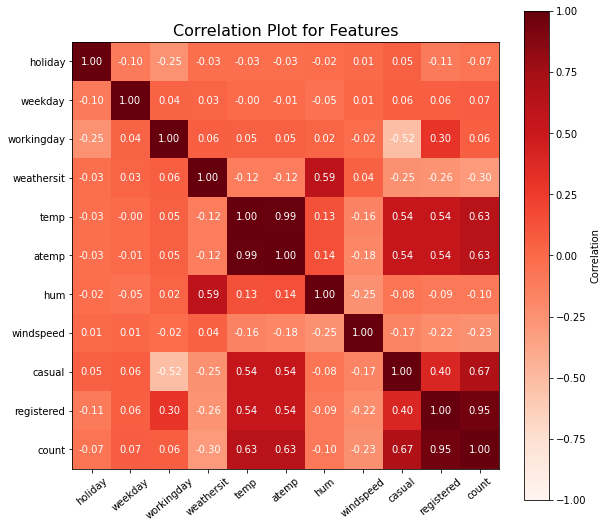

In [ ]:
names=["holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed","casual","registered","count"]
fig = plt.figure(figsize=(9, 9))
heatmap_data=day.drop(["instant","dteday", "season","yr","mnth"], axis=1).corr(method="pearson")
plt.imshow(heatmap_data.values, cmap="Reds")

plt.clim(-1,1)
plt.colorbar(label="Correlation",fraction=0.1)

plt.yticks(range(len(names)),names)
plt.xticks(range(len(names)),names,rotation=40)
for y in range(heatmap_data.shape[0]):
    for x in range(heatmap_data.shape[1]):       
        plt.text(x , y , '%.2f' % heatmap_data.iloc[y, x],
                 horizontalalignment='center',
                 verticalalignment='center', color='white'
                 )
        
plt.title("Correlation Plot for Features", size=16)
plt.show()


This correlation plot is for exploring the relationship between variables, but as it is the problem that we want to solve
the casual and registered variables will be elaborated more on. First variable that draws attention is the workingday. It 
can be seen that registered users tend to use the bike sharing system more when it is a working day and the number of casual
users goes down at the same time. This could mean that most of the registered users are workers that use bike sharing to go 
to whereas, casual users use other means to go to work. Another variable that draws attention is the weathersit. The weathersit
consist of numbers ranging from 1 to 4 that represent the weather condition, as the number goes up the weather is harsher.
It can be seen that both casual and registered have a negative relationship with the weathersit which means that the number of 
users go down as the weather condition worsens. Temp and atemp variables have the same numbers as temp is normalized temperature
and atemp is the normalized feeling temperature. They both show that the number of users for both registered users and casual 
users goes up when the weather is warmer. Windspeed and hum have both have slight negative effects as they both indicate negative
weather conditions.

###Temperature vs Counts

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


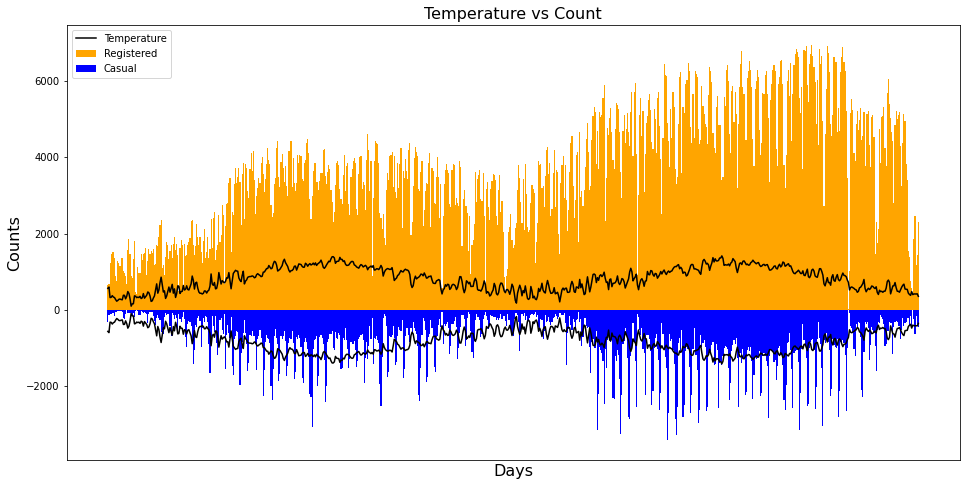

In [ ]:
plt.figure(figsize=(16,8))
plt.xlabel("Days", size=16)

ax = plt.subplot()
plt.plot(day["dteday"],day["temp"] * 41 * 40,color="black",label="Temperature")
plt.plot(day["dteday"],day["temp"] * 41 *-40,color="black")
ax.bar(day["dteday"], day["registered"], width=1, color="orange", label="Registered")
ax.bar(day["dteday"], day["casual"] * -1, width=1, color="blue", label="Casual")
ax.set_xticks([])
#ax.set_yticks([])
ax.set_ylabel("Counts", size=16)
plt.title("Temperature vs Count", size=16)
plt.legend(loc="upper left")
plt.show()

In this part, relation between temperature and registered/casual users is shown. Yellow part demonstrates the number of registered users. Blue part demonstrates the number of casual users. Black part is showing the temperature rising and falling. Even though we can not see the exact value of temperature in this graph, the increases and the decreases of temperature can be clearly seen. Both number of registered users and number of casual users are related to temperature. They increase if temperature increases and decrease if temperature decreases.

### Weathersit vs Counts

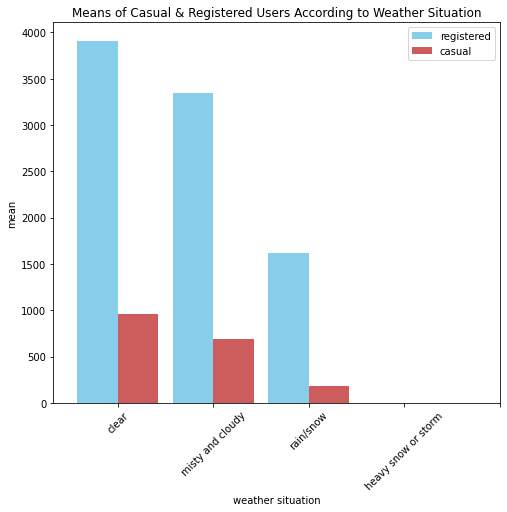

In [ ]:
GR = day.groupby("weathersit")["registered"].mean()
GC = day.groupby("weathersit")["casual"].mean()
df1 = pd.DataFrame(GR)
df2 = pd.DataFrame(GC)

df = pd.merge(df1, df2, on='weathersit', how='outer')

ax = df.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Means of Casual & Registered Users According to Weather Situation", figsize=(8,7), width = 0.85)
ax.set_xlabel("weather situation")
ax.set_ylabel("mean")
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(["clear","misty and cloudy","rain/snow","heavy snow or storm"])
plt.xticks(rotation=45)

plt.show()

This part shows the relation between the means of registered and casual numbers and weather situation. It can be seen that while weather is getting worse, both numbers of registered and casual users go down.

### Season vs Count

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


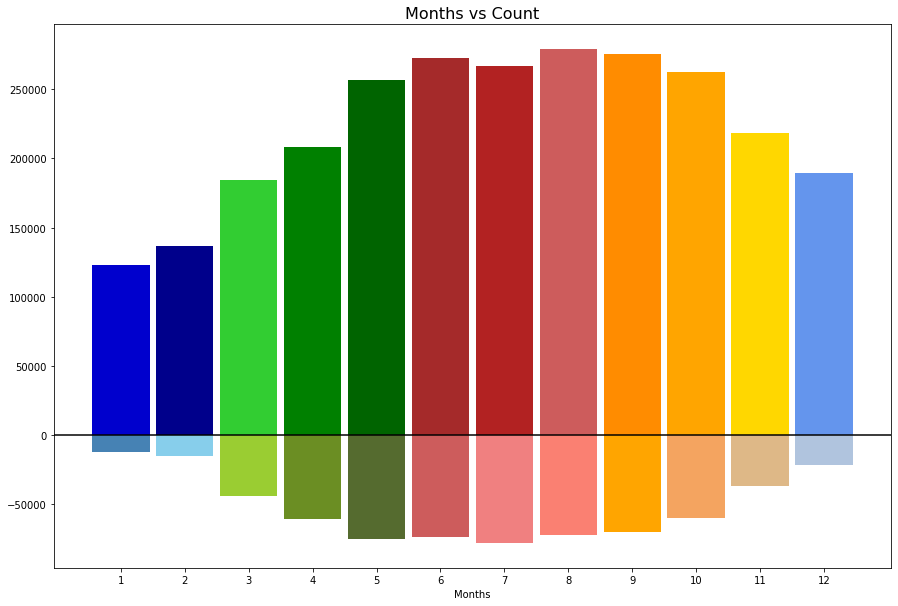

In [ ]:
casuals={}
registereds={}
index1 = (day.columns.get_loc("mnth"))
index2 = (day.columns.get_loc("registered"))
index3 = (day.columns.get_loc("casual"))

for i in range(len(day)):
  d          = float(day.iloc[i][index1])
  registered = day.iloc[i][index2]
  casual     = day.iloc[i][index3]
  if d in casuals.keys():
    registereds[d] = registereds[d] + registered
    casuals[d] = casuals[d] + casual
  else:
    registereds[d] = registered
    casuals[d] = casual

casuals2={}
registereds2={}
for i in casuals.keys():
  casuals2[i] = -1*casuals[i]
  registereds2[i] = 1*registereds[i]

plt.figure(figsize=(15,10))
plt.xlabel("Months")
ax = plt.subplot()

colors1 = ["steelblue","skyblue","yellowgreen","olivedrab","darkolivegreen",
           "indianred","lightcoral","salmon","orange","sandybrown","burlywood",
           "lightsteelblue"]
colors2 = ["mediumblue","darkblue","limegreen","green","darkgreen","brown",
           "firebrick","indianred","darkorange","orange","gold","cornflowerblue"]
ax.bar(list(casuals2.keys()), list(casuals2.values()), width=0.9, color=colors1)
ax.bar(list(registereds2.keys()), list(registereds2.values()), width=0.9, color=colors2)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("Months vs Count", size=16)
ax.axhline(0,color="black")
plt.show()

This graph shows the relation between months and number of registered/casual users. It is seen that registered users are mostly cumulated on summer and fall. Furthermore, number of casual users is highest in summer months.

### Windspeed-Count Density Graph

In [ ]:

x = day["windspeed"] 
y = day["registered"]
import plotly.graph_objects as go 
fig= go.Figure(go.Histogram2dContour(x = x,y = y,colorscale = 'Jet',
        contours = dict(showlabels = True,labelfont = dict(family = 'Raleway',color = 'white')),
        hoverlabel = dict(bgcolor = 'white',bordercolor = 'black',font = dict(family = 'Raleway',color = 'black'))), 
        layout=dict(title=dict(text="Windspeed-Count Density Graph for Registered Users"))
)
fig.show()
x = day["windspeed"] 
y = day["casual"]
fig = go.Figure(go.Histogram2dContour(x = x,y = y,colorscale = 'Jet',
        contours = dict(showlabels = True,labelfont = dict(family = 'Raleway',color = 'white')),
        hoverlabel = dict(bgcolor = 'white',bordercolor = 'black',font = dict(family = 'Raleway',color = 'black'))), 
        layout=dict(title=dict(text="Windspeed-Count Density Graph for Casual Users"))
)
fig.show()

Windspeed vs Count
In this part, the relation between wind speed and the number of registered/casual users is shown. These graphs show the density of specific number of registered/casual users for normalized wind speed values. As a result, there is a higher possibility of having 3000-4000 registered users when the wind speed value is 0.125 (normalized value). On the other hand, there is a higher possibility of having 250-1000 casual users when the wind speed is between 0.125-0.225 (normalized value).

### Humidty-Count Density Graph

In [ ]:
x = day["hum"] 
y = day["registered"]
import plotly.graph_objects as go 
fig= go.Figure(go.Histogram2dContour(x = x,y = y,
        contours = dict(showlabels = True,labelfont = dict(family = 'Raleway',color = 'white')),
        hoverlabel = dict(bgcolor = 'white',bordercolor = 'black',font = dict(family = 'Raleway',color = 'black'))), 
        layout=dict(title=dict(text="Humidty-Count Density Graph for Registered Users"))
)
fig.show()
x = day["hum"] 
y = day["casual"]
import plotly.graph_objects as go 
fig= go.Figure(go.Histogram2dContour(x = x,y = y,
        contours = dict(showlabels = True,labelfont = dict(family = 'Raleway',color = 'white')),
        hoverlabel = dict(bgcolor = 'white',bordercolor = 'black',font = dict(family = 'Raleway',color = 'black'))), 
        layout=dict(title=dict(text="Humidty-Count Density Graph for Casual Users"))
)
fig.show()

In this part, the relation between humidity and the number of registered/casual users is shown. These graphs show the density of specific number of registered/casual users for normalized humidity values. As a result, there is a higher possibility of having 3000-4000 registered users when the humidity value is between 0.6-0.8 (normalized value). On the other hand, there is a higher possibility of having 250-1000 casual users when the humidity is between 0.5-0.8 (normalized value).

### Distribution of Registered and Casual Users in a Daily Time

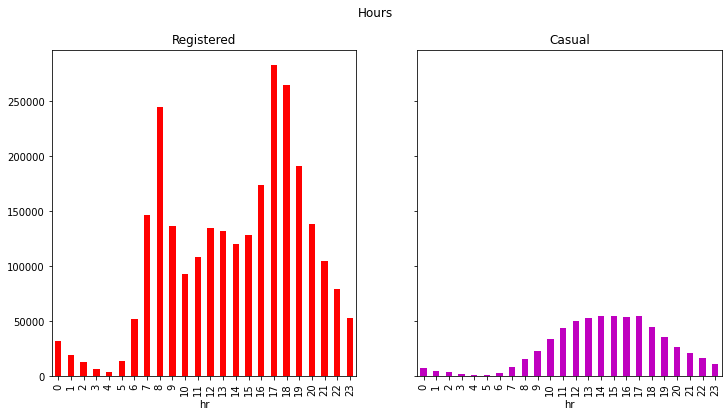

In [ ]:
groupedR=hour.groupby('hr')['registered'].sum()
groupedC=hour.groupby('hr')['casual'].sum()
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)  

groupedR.plot.bar(ax=ax[0], color="r")
ax[0].set_title("Registered")

groupedC.plot.bar(ax=ax[1], color="m")
ax[1].set_title("Casual")
#groupedC2.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)


plt.suptitle("Hours")
plt.show()


This bar plot shows the sum of hourly users of all the dataset for registered users and casual users. From the first plot that shows registered user counts for different hours,
it can be seen that the usage increases during 08.00-09.00 and 17.00-19.00. From this information it can be deducted that most of the registered users are workers who use this system to go to work.
It can also be seen that, casual bike users are cumulated around 12.00-18.00, but we couldn't find any factors that creates this distribution like we did in registered users' case.

### Hypothesis Testing: Testing whether time slots are evenly distributed or not.

Null Hypothesis: Count of registered users are evenly distributed across the time (100/24= 4.4--> 4.43 => 13% percent for 3 time slots)<br>
Alternative Hypothesis: Registered bicycle users cover more than 13% percentage in all times at the beginning and the ending of the working hours (8-9, 17-19) (Null Hypothesis suggests that all times slots are equally distributed. According to that 3 time slots should take 13% percent however alternative hypothesis suggest it should be more than that.)

In [ ]:
date=hour.iloc[0]['dteday']
row, column=hour.shape
my=[8,17,18]
sumAll=0
count=0
sumValid=0
for i in range(row):
  if hour.iloc[i]['dteday']==date:
    sumAll+=hour.iloc[i]['registered']
    if hour.iloc[i]['hr'] in my:
      sumValid+=hour.iloc[i]['registered']
  else:
    date=hour.iloc[i]['dteday']
    if sumValid<=sumAll*0.13:
      count+=1
    sumValid=0
    sumAll=0
print("p_value:",count/(row/24))

p_value: 0.026238563783877095


We rejected the null hypothesis since p_value <0.05, beginning and end of the working hours cover up more than 13%.

### Distribution of Casual and Registered Users according to Working Days


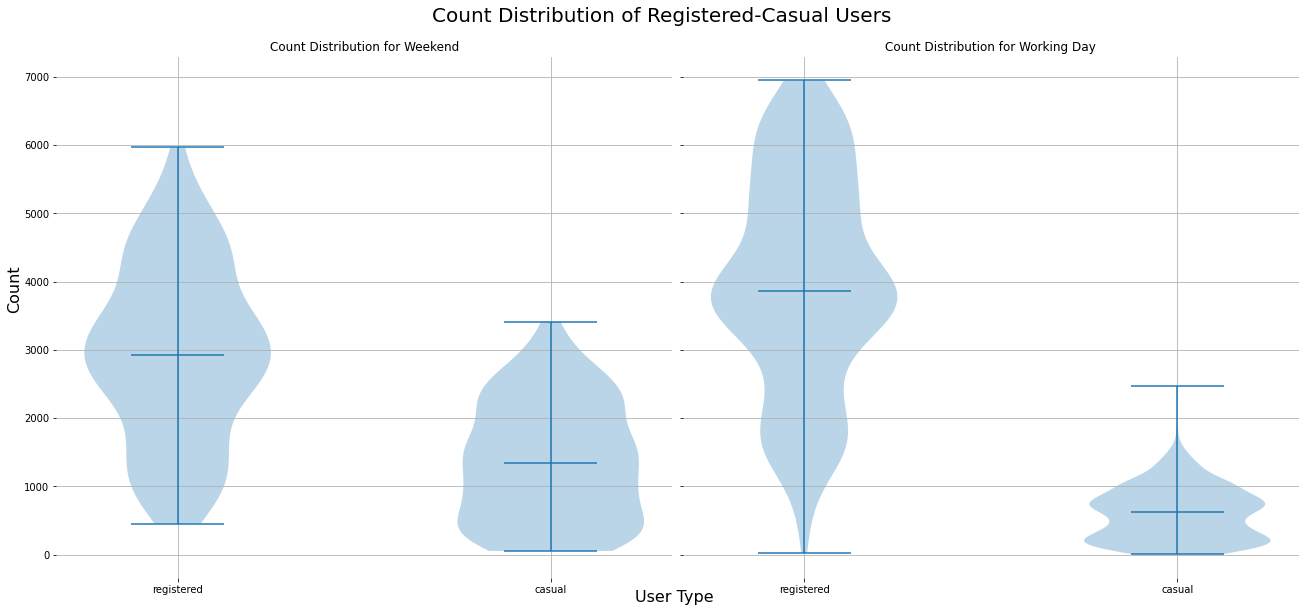

In [ ]:
tm=['Weekend', 'Working Day']
fig, axs=plt.subplots(1,2, figsize=(18, 8),sharey=True)

for i in range(2):
  ax=axs[i]
  indexes=[]
  holiday=day[day['workingday']==i]
  meanCasual=np.median(holiday['casual'])
  meanRegistered=np.median(holiday['registered'])
  if meanCasual>meanRegistered:
    indexes.append('casual')
    indexes.append('registered')
  else:
    indexes.append('registered')
    indexes.append('casual')

  all_values=[]
  for k in indexes:
    temp=[item for item in holiday[k]]
    all_values.append(temp)
  ax.violinplot(all_values, showmedians=True)

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.grid()

  ax.set_xticks(np.arange(1, 3))
  ax.set_xticklabels(indexes)
  ax.set_title('Count Distribution for '+tm[i])

fig.suptitle("Count Distribution of Registered-Casual Users", size=20, y=1.04)
plt.tight_layout()
fig.text(0.51, 0.015, 'User Type', va='center', ha='center', size=16)
fig.text(0.001, 0.55, 'Count', rotation='vertical',va='center', ha='center', size=16)
plt.show()

This violin plot shows the distribution between registered and casual users at a working day and at a
weekend/holiday. For both the rest days and the weekdays, it can be seen that the number of registered users exceed the number of 
casual users. Firstly, lets take a look at the number of registered users for both rest days and working days. The count of
registered users during a working day is more than the count of registered users that
is using the system during a rest day. As it was explained in the correlation plot this could mean that the registered users 
could be workers using the system to go to work. When the number of casual user are taken under consideration, it is seen
that there are more casual users when it is a rest day.

### Hypothesis Testing: Ttest for Casual Users

Null Hypothesis: Casual users tend to use bicycles regardless of whether the day is a working day or not (50% of usage count is for working day vice versa). <br>
Alternative Hypothesis: Casual users tend to use more bicycles on the weekends.

In [ ]:
npWo=np.array(day[day['workingday']==1]['casual'])
npWe=np.array(day[day['workingday']==0]['casual'])

stats.ttest_ind(npWo, npWe, equal_var=False)


Ttest_indResult(statistic=-12.73162293246202, pvalue=1.7859996470149252e-29)

Since p-value is less than 0.05, the null hypothesis is rejected. According to the statistic value, the mean of weekend is greater than the mean of working day for registered users.

###Hypothesis Testing: Ttest for Registered *Users*

Null Hypothesis: Registered users uses bicycles regardless of wether the day is a working day or not. <br>
Alternative Hypothesis: Registered users tend to use bicycles more on weekdays.

In [ ]:
npWo=np.array(day[day['workingday']==1]['registered'])
npWe=np.array(day[day['workingday']==0]['registered'])

stats.ttest_ind(npWo, npWe, equal_var=False)

Ttest_indResult(statistic=9.239383025330435, pvalue=5.822103746445285e-19)

Since p-value is less than 0.05, the null hypothesis is rejected. According to the statistic value, the mean of working day is greater than the mean of weekend for registered users.

## Machine Learning Models

In this part, we used two different Machine Learning techniques to implement to 5 Machine Learning models.

### Implementation

All of the Machine Learning models can be called by a single function to run test cases, which will be seen on Discussion and Results part below.

### Registered User Count: 80% Training, 10% Validation, 10% Test 

In this Machine Learning model, we are implementing multi-linear regression to predict registered user count.

In [ ]:
from sklearn.model_selection import train_test_split
features=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
## droped dteday since it is not numeric also it is in the data via year, month entries
day_features=day[features].values 
day_registered_label=day['registered'].values

#registered drx stands for day registered x
drx_train, drx_remain, dry_train, dry_remain =train_test_split(day_features, day_registered_label, test_size=0.2, random_state=0)
drx_val, drx_test, dry_val, dry_test= train_test_split(drx_remain, dry_remain, test_size=0.5,random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model_registered = LinearRegression()  
model_registered.fit(drx_train, dry_train)
coeff_df = pd.DataFrame(model_registered.coef_, features, columns=['Coefficient'])  
coeff_df

,Coefficient
season,410.753889
yr,1710.035596
mnth,-17.418017
holiday,-95.720863
weekday,51.495778
workingday,905.198183
weathersit,-436.894493
temp,840.505315
atemp,2832.149086
hum,-914.922487


Above there are coefficients of the linear equations.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

dry_Vpred = model_registered.predict(drx_val)

mse = mean_squared_error(dry_val, dry_Vpred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(dry_val, dry_Vpred)
b_mse=mse
b_rsme=rmse ## these will be used for comparing after
b_mae=mae
print("mse: {}".format(mse)) #MSE stands for Mean Squared Error
print("rmse: {}".format(rmse)) #RMSE stands for Root of Mean Squared Error
print("mae: {}".format(mae)) #MAE stands for Mean Absolute Error

mse: 367008.201640597
rmse: 605.8120184022408
mae: 485.5539293837506


These are the initial values for the errors when we use all of the features.

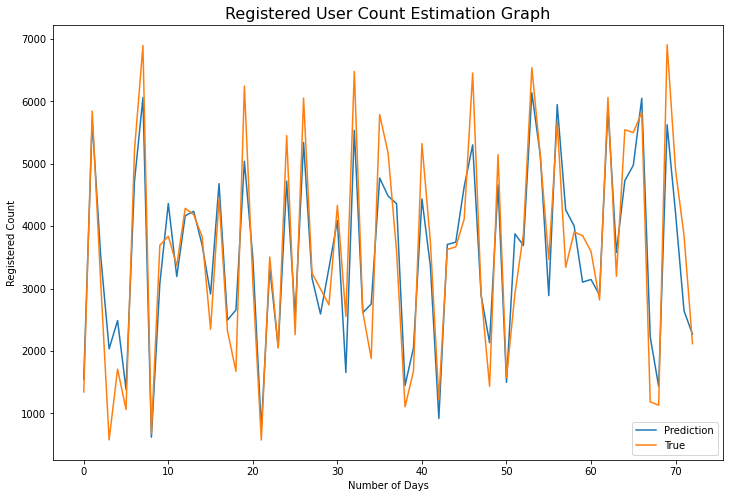

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(dry_Vpred, label="Prediction")
plt.plot(dry_val, label="True")
plt.xlabel("Number of Days")
plt.ylabel("Registered Count")
plt.title("Registered User Count Estimation Graph", size=16)
plt.legend()
plt.show()

This is our initial estimation for the validation data by using multi-linear regression.

Below, we try to perfect our estimation by removing some of the features via checking the MSE, RMSE and MAE values one by one.

In [ ]:
## further checking whether all of the features are relevant or not by reducing them from feature list

feature_main=features
for f in features:
  feature_copy=features.copy()
  feature_copy.remove(f)
  day_features_copy=day[feature_copy].values ## droped dteday since it is not numeric also in the data via year, month entries
  day_registered_label_copy=day['registered'].values
  drx_train_c, drx_remain_c, dry_train_c, dry_remain_c =train_test_split(day_features_copy, day_registered_label_copy, test_size=0.2, random_state=0)
  drx_val_c, drx_test_c, dry_val_c, dry_test_c= train_test_split(drx_remain_c, dry_remain_c, test_size=0.5,random_state=0)
  model_registered_c = LinearRegression()  
  model_registered_c.fit(drx_train_c, dry_train_c)
  dry_Vpred_c = model_registered_c.predict(drx_val_c)
  mse_c = mean_squared_error(dry_val_c, dry_Vpred_c)
  rmse_c = np.sqrt(mse_c)
  mae_c = mean_absolute_error(dry_val_c, dry_Vpred_c)
  if (rmse_c<rmse) and (mae_c<mae):
    feature_main=feature_copy
    rmse=rmse_c
    mae=mae_c
    mse=mse_c
    model_registered=model_registered_c
    dry_Vpred=dry_Vpred_c
    dry_test=dry_test_c
    dry_val=dry_val_c
    dry_train=dry_train_c
    drx_test=drx_test_c
    drx_val=drx_val_c
    drx_train=drx_train_c

In [ ]:
print(features)
print(feature_main) ## without humidty our regression model performs better
print("Before:","mse: {}".format(b_mse),"rmse: {}".format(b_rsme),"mae: {}".format(b_mae))
print("After:","mse: {}".format(mse),"rmse: {}".format(rmse),"mae: {}".format(mae))

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'windspeed']
Before: mse: 367008.201640597 rmse: 605.8120184022408 mae: 485.5539293837506
After: mse: 342528.2059041094 rmse: 585.2590929700361 mae: 472.79451357345744


Our perfected Machine Learning algorithm removed some of the features- humidity.

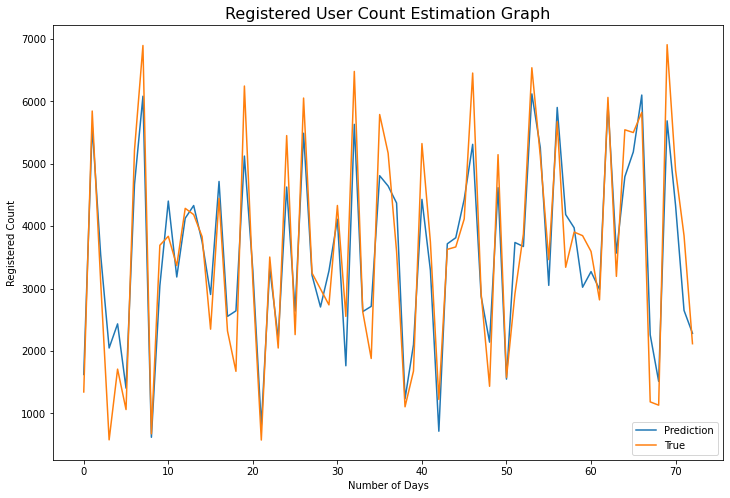

In [ ]:
def RegisteredUserEstimator(test, drx_val, dry_test, model_registered, drx_test, dry_val):
  if test=="test":
    drx_val=drx_test
    dry_val=dry_test
  dry_pred=model_registered.predict(drx_val)
  plt.figure(figsize=(12,8))
  plt.plot(dry_pred, label="Prediction")
  plt.plot(dry_val, label="True")
  plt.xlabel("Number of Days")
  plt.ylabel("Registered Count")
  plt.title("Registered User Count Estimation Graph", size=16)
  plt.legend()
  plt.show()
RegisteredUserEstimator("val", drx_val, dry_test, model_registered, drx_test, dry_val)

Our last estimation for the validation data for the registered users.

### Casual User Count: 80% Training, 10% Validation, 10% Test

In this Machine Learning model, we are implementing multi-linear regression to predict casual user count.

In [ ]:
from sklearn.model_selection import train_test_split
features=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
## droped dteday since it is not numeric also in the data via year, month entries
day_features=day[features].values 
day_casual_label=day['casual'].values

# casual dcx stands for day casual x
dcx_train, dcx_remain, dcy_train, dcy_remain =train_test_split(day_features, day_casual_label, test_size=0.2, random_state=0)
dcx_val, dcx_test, dcy_val, dcy_test= train_test_split(dcx_remain, dcy_remain, test_size=0.5,random_state=0)

In [ ]:
model_casual = LinearRegression()  
model_casual.fit(dcx_train, dcy_train)
coeff_df = pd.DataFrame(model_casual.coef_, features, columns=['Coefficient'])  
coeff_df

,Coefficient
season,54.084408
yr,264.376454
mnth,-13.259734
holiday,-279.468962
weekday,22.207694
workingday,-831.028121
weathersit,-84.053681
temp,1767.363726
atemp,238.888301
hum,-398.580631


Above there are coefficients of the linear equations.

In [ ]:
dcy_Vpred = model_casual.predict(dcx_val)
mse = mean_squared_error(dcy_val, dcy_Vpred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(dcy_val, dcy_Vpred)
b_mse=mse
b_rsme=rmse ## these will be used for comparing after
b_mae=mae
print("mse: {}".format(mse))
print("rmse: {}".format(rmse))
print("mae: {}".format(mae))

mse: 133993.44560151864
rmse: 366.05115161889415
mae: 276.7575717494336


These are the initial values for the errors when we use all of the features.

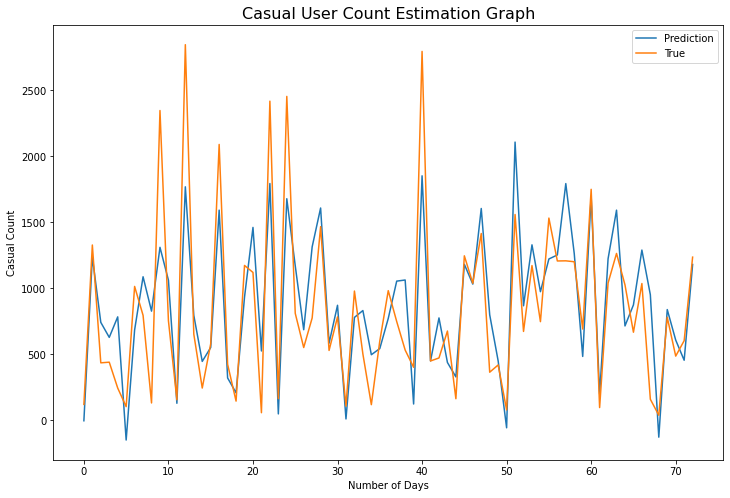

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(dcy_Vpred, label="Prediction")
plt.plot(dcy_val, label="True")
plt.xlabel("Number of Days")
plt.ylabel("Casual Count")
plt.title("Casual User Count Estimation Graph", size=16)
plt.legend()
plt.show()

This is our initial estimation for the validation data by using multi-linear regression.

Below, we try to perfect our estimation by removing some of the features via checking the MSE, RMSE and MAE values one by one.

In [ ]:
## further checking whether all of the features are relevant or not by reducing them from feature list

feature_main=features
for f in features:
  feature_copy=features.copy()
  feature_copy.remove(f)
  day_features_copy=day[feature_copy].values ## droped dteday since it is not numeric also in the data via year, month entries
  day_casual_label_copy=day['casual'].values
  dcx_train_c, dcx_remain_c, dcy_train_c, dcy_remain_c =train_test_split(day_features_copy, day_casual_label_copy, test_size=0.2, random_state=0)
  dcx_val_c, dcx_test_c, dcy_val_c, dcy_test_c= train_test_split(dcx_remain_c, dcy_remain_c, test_size=0.5,random_state=0)
  model_casual_c = LinearRegression()  
  model_casual_c.fit(dcx_train_c, dcy_train_c)
  dcy_Vpred_c = model_casual_c.predict(dcx_val_c)
  mse_c = mean_squared_error(dcy_val_c, dcy_Vpred_c)
  rmse_c = np.sqrt(mse_c)
  mae_c = mean_absolute_error(dry_val_c, dcy_Vpred_c)
  if (rmse_c<rmse) and (mae_c<mae):
    print(f)
    feature_main=feature_copy
    rmse=rmse_c
    mae=mae_c
    mse=mse_c
    model_casual=model_casual_c
    dcy_Vpred=dcy_Vpred_c
    dcy_test=dcy_test_c
    dcy_val=dcy_val_c
    dcy_train=dcy_train_c
    dcx_test=dcx_test_c
    dcx_val=dcx_val_c
    dcx_train=dcx_train_c

In [ ]:
print(features)
print(feature_main) ## there is not any change our regression model performs better with all of the features.
print("Before:","mse: {}".format(b_mse),"rmse: {}".format(b_rsme),"mae: {}".format(b_mae))
print("After:","mse: {}".format(mse),"rmse: {}".format(rmse),"mae: {}".format(mae))

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
Before: mse: 133993.44560151864 rmse: 366.05115161889415 mae: 276.7575717494336
After: mse: 133993.44560151864 rmse: 366.05115161889415 mae: 276.7575717494336


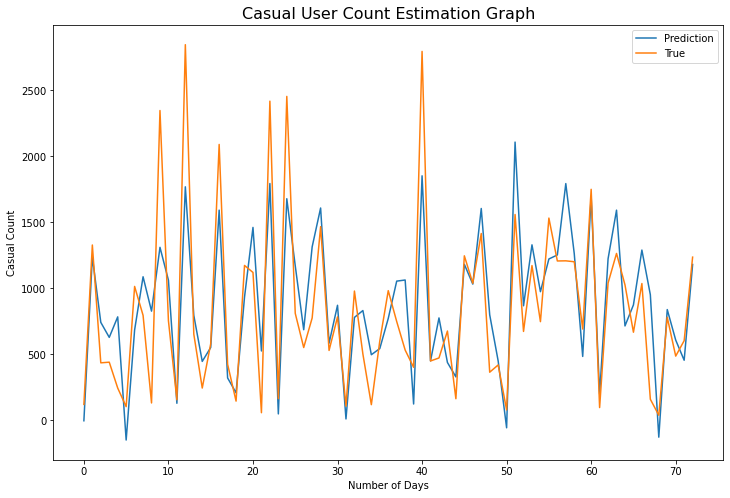

In [ ]:
def CasualUserEstimator(test, dcx_val, dcy_test, model_casual, dcx_test, dcy_val):
  if test=="test":
    dcx_val=dcx_test
    dcy_val=dcy_test
  dcy_pred=model_casual.predict(dcx_val)
  plt.figure(figsize=(12,8))
  plt.plot(dcy_pred, label="Prediction")
  plt.plot(dcy_val, label="True")
  plt.xlabel("Number of Days")
  plt.ylabel("Casual Count")
  plt.title("Casual User Count Estimation Graph", size=16)
  plt.legend()
  plt.show()
CasualUserEstimator("val", dcx_val, dcy_test, model_casual, dcx_test, dcy_val)

Our last estimation for the validation data for the casual users. As it can be seen, our prediction is a little bit precise :).

### With KNN


Here, we try to predict the same things as above, which are registered and casual user counts, but with kNN.

mse: 533743.4092465753
rmse: 776.1064512966583
mae: 554.0958904109589


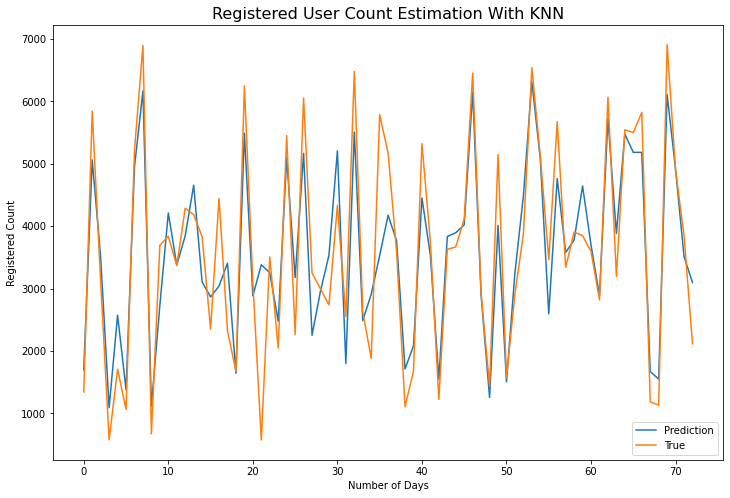

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.colors import ListedColormap
from ipywidgets import interact
myfeatures=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
features = day[myfeatures]
registered_label = day['registered']
casual_label= day['casual']


  #model_casual = KNeighborsClassifier(11, metric='euclidean') 
  #cx_train, cx_remain, cy_train, cy_remain=train_test_split(features, casual_label, test_size=0.2, random_state=0)
  #cx_val, cx_test, cy_val, cy_test=train_test_split(cx_remain, cy_remain, test_size=0.5, random_state=0) 
  #model_casual.fit(cx_train, cy_train)
best_k=0
mse_Rknn = 10000000000
rmse_Rknn = 10000000000
mae_Rknn= 100000000000 ## sufficiently big numbers for start
for k in range(1,20):

  model_registered2 = KNeighborsRegressor(k, metric='euclidean')

  rx_train, rx_remain, ry_train, ry_remain=train_test_split(features, registered_label, test_size=0.2, random_state=0)
  rx_val, rx_test, ry_val, ry_test=train_test_split(rx_remain, ry_remain, test_size=0.5, random_state=0) 
  model_registered2.fit(rx_train, ry_train)
  
  
  rx_Vpred=model_registered2.predict(rx_val)
  #print(rx_Vpred)
  mse_Rknn_new = mean_squared_error(rx_Vpred, ry_val)
  rmse_Rknn_new = np.sqrt(mse_Rknn)
  mae_Rknn_new = mean_absolute_error(ry_val, rx_Vpred)

  if (mse_Rknn_new<mse_Rknn) and (rmse_Rknn_new<rmse_Rknn) and (mae_Rknn_new<mae_Rknn):
    mse_Rknn=mse_Rknn_new
    rmse_Rknn=rmse_Rknn_new
    mae_Rknn=mae_Rknn_new
    best_k=k

print("mse: {}".format(mse_Rknn))
print("rmse: {}".format(rmse_Rknn))
print("mae: {}".format(mae_Rknn))

model_registered2 = KNeighborsRegressor(best_k, metric='euclidean')
rx_train, rx_remain, ry_train, ry_remain=train_test_split(features, registered_label, test_size=0.2, random_state=0)
rx_val, rx_test, ry_val, ry_test=train_test_split(rx_remain, ry_remain, test_size=0.5, random_state=0) 
model_registered2.fit(rx_train, ry_train)
rx_Vpred=model_registered2.predict(rx_val)

plt.figure(figsize=(12,8))
plt.plot(rx_Vpred, label="Prediction")
plt.plot(np.array(ry_val), label="True")
plt.xlabel("Number of Days")
plt.ylabel("Registered Count")
plt.title("Registered User Count Estimation With KNN", size=16)
plt.legend()
plt.show()

This is our kNN predictions and true values graph. Blue line shows our predictions and orange line is true values. This prediction model is a little bit better than multi-lineaer regression model which is above, one can see that by comparing their RMSA, MSA, MAE values.

This is the graph for casual user count

mse: 116644.37733499377
rmse: 100000.0
mae: 246.7459526774595


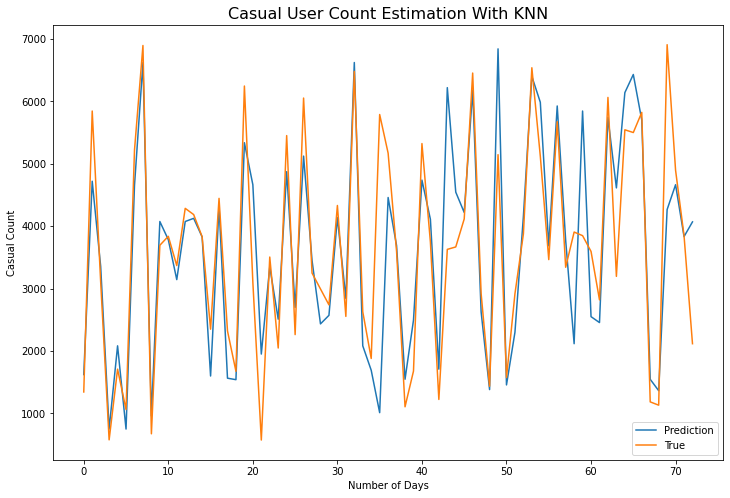

In [ ]:

best_k=0
mse_Rknn = 10000000000
rmse_Rknn = 10000000000
mae_Rknn= 100000000000 ## sufficiently big numbers for start
for k in range(1,20):

  model_casual2 = KNeighborsRegressor(11, metric='euclidean') 
  cx_train, cx_remain, cy_train, cy_remain=train_test_split(features, casual_label, test_size=0.2, random_state=0)
  cx_val, cx_test, cy_val, cy_test=train_test_split(cx_remain, cy_remain, test_size=0.5, random_state=0) 
  model_casual2.fit(cx_train, cy_train)
  
  
  cx_Vpred=model_casual2.predict(cx_val)
  #print(rx_Vpred)
  mse_Rknn_new = mean_squared_error(cx_Vpred, cy_val)
  rmse_Rknn_new = np.sqrt(mse_Rknn)
  mae_Rknn_new = mean_absolute_error(cy_val, cx_Vpred)

  if (mse_Rknn_new<mse_Rknn) and (rmse_Rknn_new<rmse_Rknn) and (mae_Rknn_new<mae_Rknn):
    mse_Rknn=mse_Rknn_new
    rmse_Rknn=rmse_Rknn_new
    mae_Rknn=mae_Rknn_new
    best_k=k

print("mse: {}".format(mse_Rknn))
print("rmse: {}".format(rmse_Rknn))
print("mae: {}".format(mae_Rknn))

model_casual2 = KNeighborsRegressor(best_k, metric='euclidean')
cx_train, cx_remain, cy_train, cy_remain=train_test_split(features, registered_label, test_size=0.2, random_state=0)
cx_val, cx_test, cy_val, cy_test=train_test_split(cx_remain, cy_remain, test_size=0.5, random_state=0) 
model_casual2.fit(cx_train, cy_train)
cx_Vpred=model_casual2.predict(cx_val)

plt.figure(figsize=(12,8))
plt.plot(cx_Vpred, label="Prediction")
plt.plot(np.array(cy_val), label="True")
plt.xlabel("Number of Days")
plt.ylabel("Casual Count")
plt.title("Casual User Count Estimation With KNN", size=16)
plt.legend()
plt.show()

This is our kNN predictions and true values graph. Blue line shows our predictions and orange line is true values. Overall the KNN prediction model is worse than multi-lineaer regression model which is above, one can see that by comparing their RMSA, MSA, MAE values.

### Hourly User Estimation

Distribution of registered and casual users in a daily time
In this part we try to see the precision of our predictions that we made about hourly number of registered/casual user. We tried to predict the busiest hours of a day which we found out in the “Distribution of Registered and Casual Users in a Daily Time”(in EDA part) which are 8-12-14-17-18. 12 and 14 is not included in “Distribution of Registered and Casual Users in a Daily Time” part but there is no harm adding them.

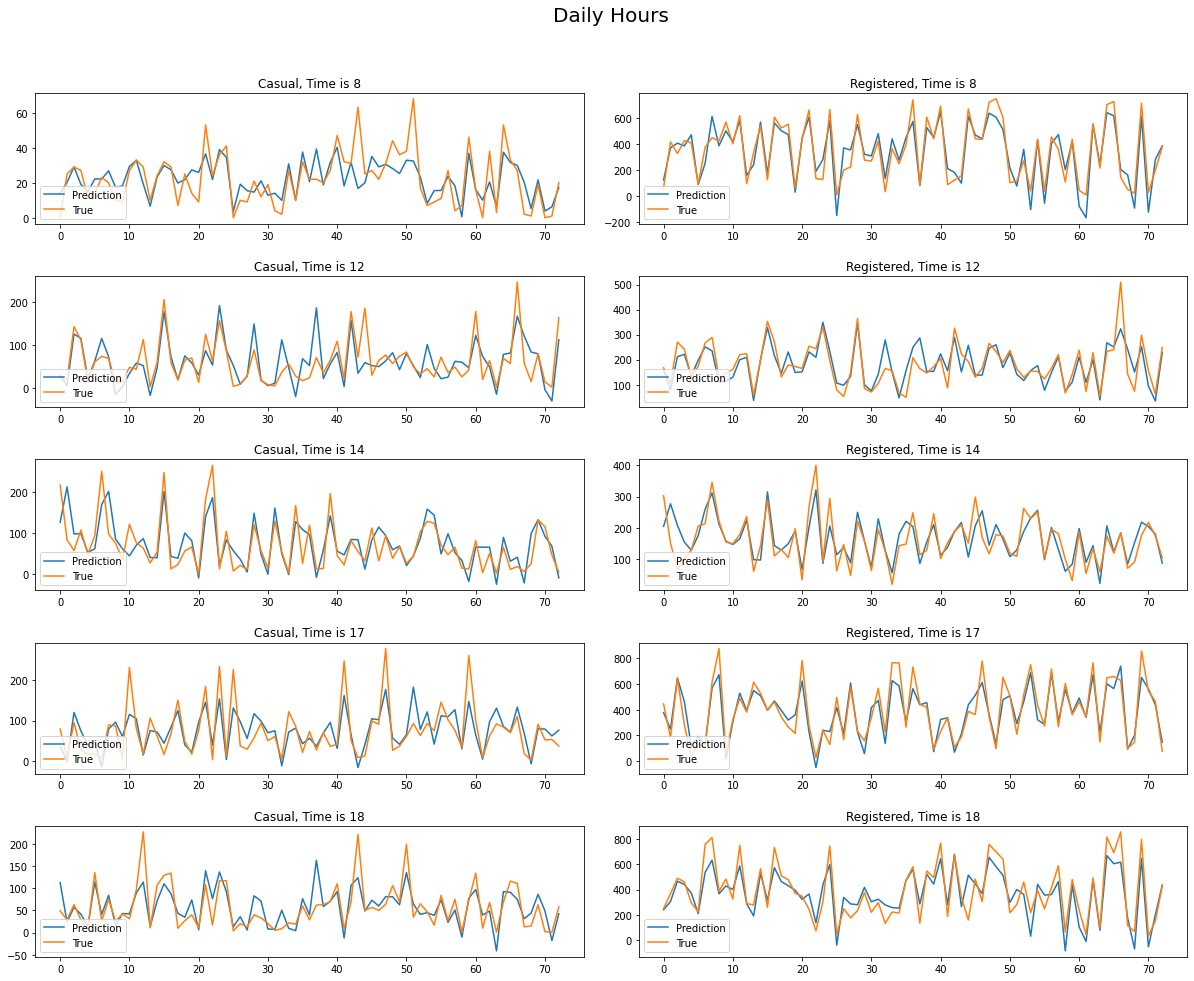

In [ ]:
def HourlyUserEstimation(myTest):
  features=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
  ## droped dteday since it is not numeric also in the data via year, month entries
  myhours=[8,12,14,17,18]
  fig, axs=plt.subplots(5,2, figsize=(20,15))
  for h in range(len(myhours)):
    hour_new=hour[hour['hr']==myhours[h]]
    hour_features=hour_new[features].values 
    hour_registered_label=hour_new['registered'].values
    hour_casual_label=hour_new['casual'].values
    #registered drx stands for day registered x
    hrx_train, hrx_remain, hry_train, hry_remain =train_test_split(hour_features, hour_registered_label, test_size=0.2, random_state=0)
    hrx_val, hrx_test, hry_val, hry_test= train_test_split(hrx_remain, hry_remain, test_size=0.5,random_state=0)

    hcx_train, hcx_remain, hcy_train, hcy_remain =train_test_split(hour_features, hour_casual_label, test_size=0.2, random_state=0)
    hcx_val, hcx_test, hcy_val, hcy_test= train_test_split(hcx_remain, hcy_remain, test_size=0.5,random_state=0)

    model_registered_hour = LinearRegression()  
    model_registered_hour.fit(hrx_train, hry_train)

    model_casual_hour = LinearRegression()  
    model_casual_hour.fit(hcx_train, hcy_train)
    if myTest=="test":
      hcx_val=hcx_test
      hcy_val=hcy_test
      hrx_val=hrx_test
      hry_val=hry_test
    hcx_val_pred=model_casual_hour.predict(hcx_val)
    hrx_val_pred=model_registered_hour.predict(hrx_val)

    
    axs[h,0].plot(hcx_val_pred, label="Prediction")
    axs[h,0].plot(hcy_val, label= "True")
    atitle="Casual, Time is "+ str(myhours[h])
    axs[h,0].set_title(atitle)
    axs[h,0].legend(loc="lower left")
    axs[h,1].plot(hrx_val_pred,label="Prediction")
    axs[h,1].plot(hry_val, label="True")
    atitle="Registered, Time is "+ str(myhours[h])
    axs[h,1].set_title(atitle)
    axs[h,1].legend(loc="lower left")
  plt.suptitle("Daily Hours", size=20)
  
  plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.1,hspace=0.4)
  plt.show()

HourlyUserEstimation("val")

Hourly estimation 
In this part, we tried to demonstrate the precision of our predicted hourly estimation values. Orange line indicates the predicted hourly estimation values while blue line indicates the true values.  It can be seen that our predictions are highly precise.

### Who Used Most?

In this part, we try to predict whether registered users or casual users used most of the bicycles in an hour with given parameter. Also, we did hyperparameter tuning. We tried to find the best n_estimator hyperparameter and the best max_features parameter in order to have a better model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, precision_recall_curve
#manuel encoding
def change(a):
  if a==True:
    return 1
  return 0
hour['label']=(hour['registered']>hour['casual']) ## creating a new label that compares registered and casual count
hour['label']=hour['label'].apply(change)
mydict=hour['label'].value_counts().to_dict()
features=['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
x=hour[features]
y=hour['label']
Ratio=mydict[1]/mydict[0]

x_train, x_remain, y_train, y_remain = train_test_split(x,y, test_size=0.2, random_state=0)
x_val, x_test, y_val, y_test =train_test_split(x_remain,y_remain, test_size=0.5, random_state=0)

auprc=[]
n_estimators= [50,100,200,300,500]
for n in n_estimators:
  new_model=RandomForestClassifier(n_estimators=n, class_weight={0:Ratio, 1:1},random_state=0)
  new_model.fit(x_train, y_train)
  precision, recall, threshold =precision_recall_curve(y_val, new_model.predict_proba(x_val)[:, 1])
  auprc.append(auc(recall, precision))

maxiPRC=max(auprc)
idxmaxiPrc=auprc.index(maxiPRC)
max_N=n_estimators[idxmaxiPrc]
max_features= [3,4,5,6,7,8,10]
auprc2=[]
for m in max_features:
  new_model=RandomForestClassifier(n_estimators=max_N, class_weight={0:Ratio, 1:1},max_features=m, random_state=0)
  new_model.fit(x_train, y_train)
  precision, recall, _ =precision_recall_curve(y_val, new_model.predict_proba(x_val)[:,1])
  auprc2.append(auc(recall, precision))
max_M=max_features[auprc2.index(max(auprc2))]
print("N estimator is ", max_N, ", Max feature is ", max_M,".", sep="")

N estimator is 300, Max feature is 10.


In [ ]:
model_rf=RandomForestClassifier(n_estimators=max_N, class_weight={0:Ratio, 1:1}, max_features=max_M, random_state=0)
model_rf.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 42.99746835443038, 1: 1},
                       max_features=10, n_estimators=300, random_state=0)

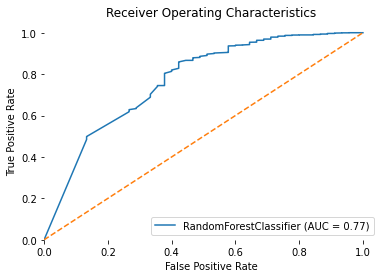

In [ ]:
from sklearn.metrics import RocCurveDisplay

def WhoUsedMost(test,model_rf, x_val, x_test, y_val,y_test):

  fig, ax=plt.subplots()
  if test=="test":
    RocCurveDisplay.from_estimator(model_rf, x_test, y_test, ax=ax)
  else:  
    RocCurveDisplay.from_estimator(model_rf, x_val, y_val, ax=ax)
  ax.set_title("Receiver Operating Characteristics")
  ax.set_xlabel("False Positive Rate")
  ax.set_ylabel("True Positive Rate")
  ax.set_xlim(left = 0)
  ax.set_ylim(bottom = 0)
  for d in ax.spines:
    ax.spines[d].set_visible(False)
  tmp=np.linspace(0,1,6, endpoint=True)
  plt.plot(tmp,tmp, linestyle="--")

  plt.show()

WhoUsedMost("val",model_rf, x_val, x_test, y_val,y_test)  

Our estimation for this part is slightly worse than the others. We conclude that by using features such as temperature, windspeed, humidty, season etc. We cannot conclude who used most of the bicycles in a given hour.

### Working Day Estimation

In this part we try to predict whether the day is a working day or not by using registered and casual user counts along with other parameters such as temperature, humidty. Apart from that, we did hyperparameter tuning. We tried to find the best n_estimator hyperparameter and the best max_features parameter in order to have a better model.

In [ ]:
mydict=hour['workingday'].value_counts().to_dict()
features=['mnth', 'registered','casual', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
x=hour[features]
y=hour['workingday']
Ratio=mydict[1]/mydict[0]

x_train2, x_remain2, y_train2, y_remain2 = train_test_split(x,y, test_size=0.2, random_state=0)
x_val2, x_test2, y_val2, y_test2 =train_test_split(x_remain2,y_remain2, test_size=0.5, random_state=0)

auprc=[]
n_estimators= [50,100,200,300,500]
for n in n_estimators:
  new_model=RandomForestClassifier(n_estimators=n, class_weight={0:Ratio, 1:1},random_state=0)
  new_model.fit(x_train2, y_train2)
  precision, recall, threshold =precision_recall_curve(y_val, new_model.predict_proba(x_val2)[:, 1])
  auprc.append(auc(recall, precision))

maxiPRC=max(auprc)
idxmaxiPrc=auprc.index(maxiPRC)
max_N=n_estimators[idxmaxiPrc]
max_features= [3,4,5,6,7,8]
auprc2=[]
for m in max_features:
  new_model=RandomForestClassifier(n_estimators=max_N, class_weight={0:Ratio, 1:1},max_features=m, random_state=0)
  new_model.fit(x_train2, y_train2)
  precision, recall, _ =precision_recall_curve(y_val2, new_model.predict_proba(x_val2)[:,1])
  auprc2.append(auc(recall, precision))
max_M=max_features[auprc2.index(max(auprc2))]
print("N estimator is ", max_N, ", Max feature is ", max_M,".", sep="")

N estimator is 200, Max feature is 3.


In [ ]:
model_rf2=RandomForestClassifier(n_estimators=max_N, class_weight={0:Ratio, 1:1}, max_features=max_M, random_state=0)
model_rf2.fit(x_train2,y_train2)

RandomForestClassifier(class_weight={0: 2.1517954298150164, 1: 1},
                       max_features=3, n_estimators=200, random_state=0)

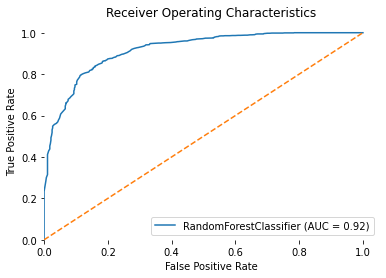

In [ ]:
from sklearn.metrics import RocCurveDisplay

def WorkingDayEstimator(test,model_rf2, x_val2, x_test2, y_val2,y_test2):

  fig, ax=plt.subplots()
  if test=="test":
    RocCurveDisplay.from_estimator(model_rf2, x_test2, y_test2, ax=ax)
  else:  
    RocCurveDisplay.from_estimator(model_rf2, x_val2, y_val2, ax=ax)
  ax.set_title("Receiver Operating Characteristics")
  ax.set_xlabel("False Positive Rate")
  ax.set_ylabel("True Positive Rate")
  ax.set_xlim(left = 0)
  ax.set_ylim(bottom = 0)
  for d in ax.spines:
    ax.spines[d].set_visible(False)
  tmp=np.linspace(0,1,6, endpoint=True)
  plt.plot(tmp,tmp, linestyle="--")

  plt.show()

WorkingDayEstimator("val",model_rf2, x_val2, x_test2, y_val2,y_test2)  

As it can be seen, our estimation for the day type is generally correct for the validation set.

### Results & Discussion

While validating our model, we saw that most of our predictions were good. We conclude that multi-linear regression is a better machine learning model than KNN for this task. We could predict registered user count, casual user count, hourly user count and working day(is the given day is a working day?) but we could not precisely predict who used most bikes given an hour. We think that our predictions will succeed in test data too. We tested our data below.

###Results for Registered Users

Test case for registered user count estimation.

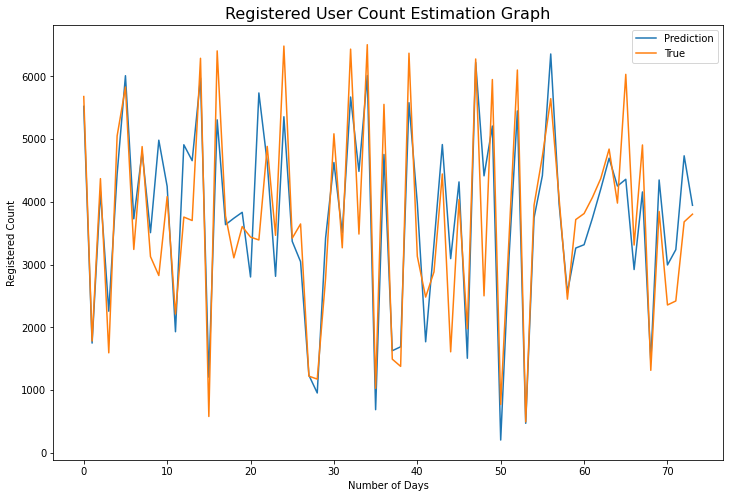

In [ ]:
RegisteredUserEstimator("test", drx_val, dry_test, model_registered, drx_test, dry_val)

As we confirmed our Machine Learning model in the validation part in above, the Machine Learning model predicts test cases sufficiently correct.

###Results for Casual Users

Test case for registered user count estimation

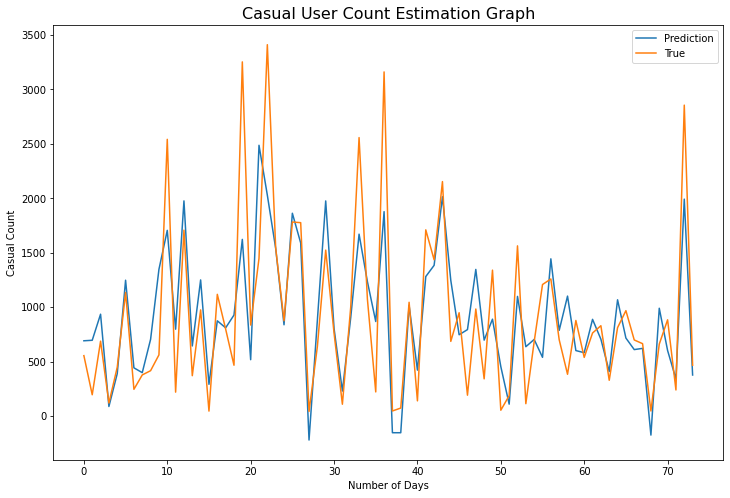

In [ ]:
CasualUserEstimator("test", dcx_val, dcy_test, model_casual, dcx_test, dcy_val)

As we confirmed our Machine Learning model in the validation part in above, the Machine Learning model predicts test cases sufficiently correct.

### Results for KNN

Registered test cases for KNN:

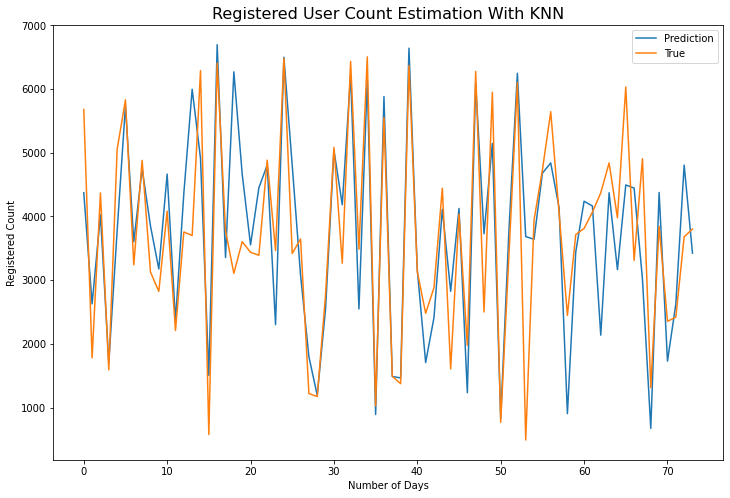

In [ ]:

rx_tpred=model_registered2.predict(rx_test)

plt.figure(figsize=(12,8))
plt.plot(rx_tpred, label="Prediction")
plt.plot(np.array(ry_test), label="True")
plt.xlabel("Number of Days")
plt.ylabel("Registered Count")
plt.title("Registered User Count Estimation With KNN", size=16)
plt.legend()
plt.show()

Casual test cases for KNN

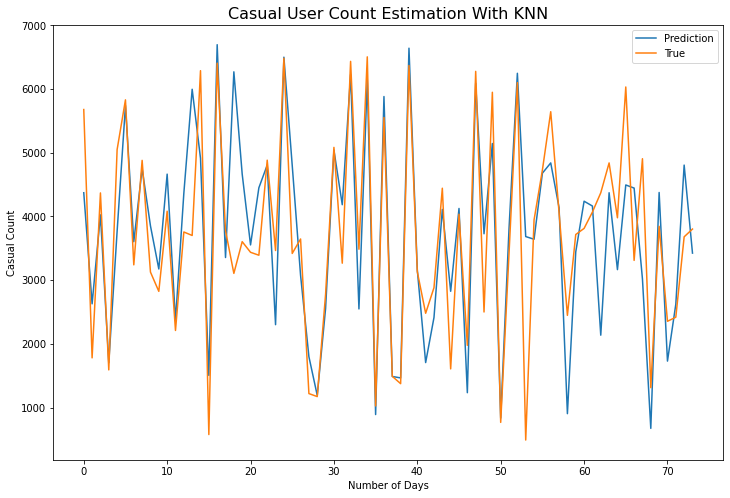

In [ ]:
cx_tpred=model_casual2.predict(cx_test)

plt.figure(figsize=(12,8))
plt.plot(cx_tpred, label="Prediction")
plt.plot(np.array(cy_test), label="True")
plt.xlabel("Number of Days")
plt.ylabel("Casual Count")
plt.title("Casual User Count Estimation With KNN", size=16)
plt.legend()
plt.show()

### Hourly User Estimation Test Part

Test case for hourly user estimation machine learning model

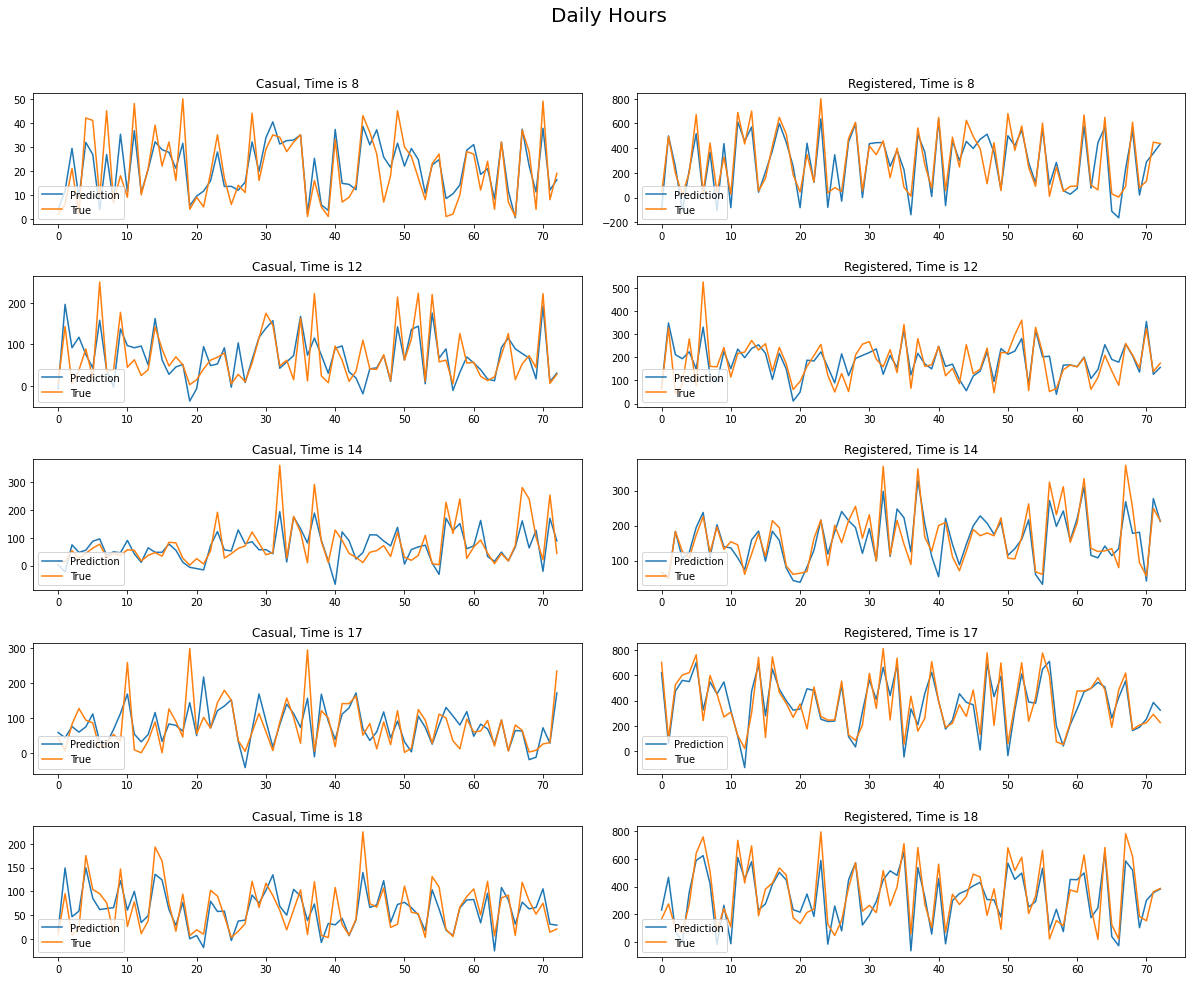

In [ ]:
HourlyUserEstimation("test")

As we confirmed our Machine Learning model in the validation part in above, the Machine Learning model predicts test cases sufficiently correct.

###Who Used Most Test Part

Test case for who used most estimation machine learning model

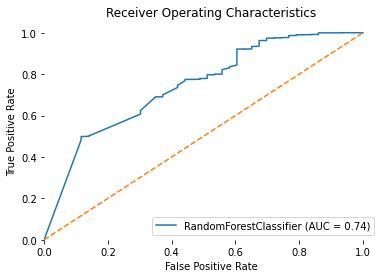

In [ ]:
WhoUsedMost("test",model_rf, x_val, x_test, y_val,y_test)  

Our estimation for this part is even worse than the validation part. As we said in the validation step, we can not conclude who are the main users in an hour by using features such as temperature, windspeed, humidty, season etc. 

###Working Day Estimation Test Part

Test case for working day estimation machine learning model

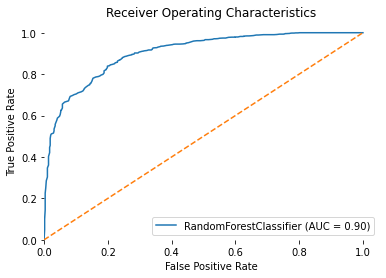

In [ ]:
WorkingDayEstimator("test",model_rf2, x_val2, x_test2, y_val2,y_test2) 

As we confirmed our Machine Learning model in the validation part in above, the Machine Learning model predicts test cases sufficiently correct.

## Conclusion

We think that our solution is applicable in order to optimize the bike sharing system. We have several very useful models predictions as the one that predicts registered user count and casual user count. The one that estimates the hourly user count is also very useful to increase the number of bikes according to a busy hour or decrease when it is not busy etc. Apart from that, we could not predict whether casual or registered users was more in a given hour. For model comparison, we conclude that multi-linear regression model is better than KNN for this task. 


## Future Work


Progress Report:
Our goals for the final report is to complete our machine learning models namely Regression and Random Forest Classifier. After completing this, we are aiming to predict the number of registered/casual users for a day or an hour. After doing these, we are planning to give suggestions to company in order to optimize their organization and structure.

Final Report: For future, the prediction of who used most bikes prediction could be improved and this would be very beneficial for the company. Also, we can try several machine learning models and try to come up with a better model. At it's current state and hopefully at it's improved states company can use this predictions to improve their organization and structure. For example, company could arrange prices for registered membership or casual bike renting prices for a specific season, day or hour. In addition, they can improve their profit by having the optimized number of bikes in the area for a given time(with the help of casual/registered user count predictions). Lastly, they can discover some new aspects of their organization such as the bike sharing activity on working days compared to weekends or holidays etc.
